# Making a Scatter Correlation Matrix using Python

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/example-data-science-notebook/iris-data-clean.csv', na_values=['NA'])

In [3]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### The first 4 columns are features of our data, the 5th column is our "class" or "category"

### Since "class" is a Python reserved word, I renamed the class column name to "category"

In [4]:
iris_data.rename(columns={'class':'category'}, inplace=True)

### Create scatter matrix using Seaborn

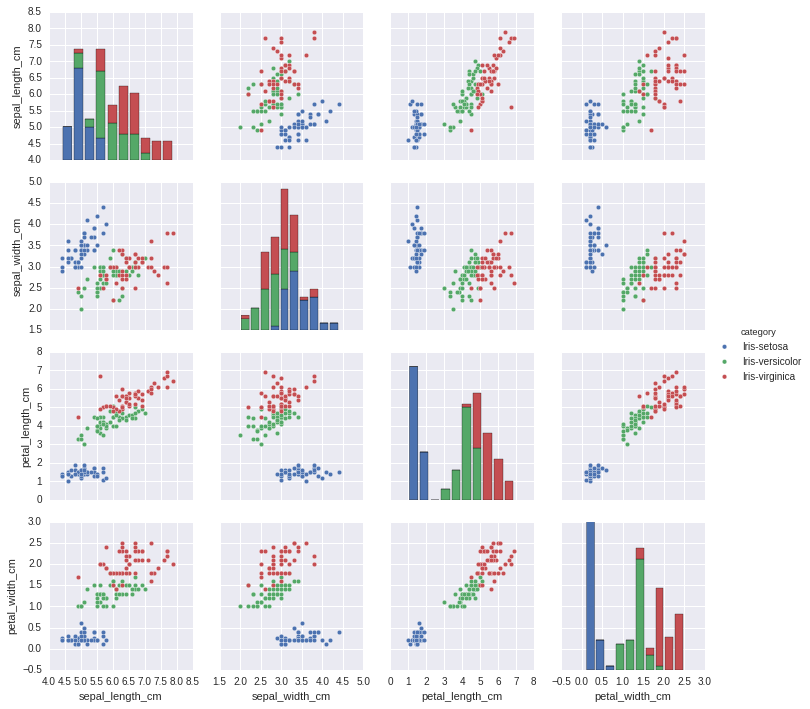

In [5]:
sns.pairplot(iris_data.dropna(), hue='category')

### Get the actual Pearson correlation coefficients

In [6]:
iris_data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.125633,0.848414,0.803132
sepal_width_cm,-0.125633,1.000000,-0.443664,-0.378865
petal_length_cm,0.848414,-0.443664,1.000000,0.960885
petal_width_cm,0.803132,-0.378865,0.960885,1.000000


In [7]:
iris_data.cov()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,0.639268,-0.043203,1.193016,0.489432
sepal_width_cm,-0.043203,0.184989,-0.335601,-0.124200
petal_length_cm,1.193016,-0.335601,3.093095,1.288047
petal_width_cm,0.489432,-0.124200,1.288047,0.580935


### People may prefer heat map matrix of the Pearson correlation coefficients

(array([ 0.5,  1.5,  2.5,  3.5]), <a list of 4 Text xticklabel objects>)

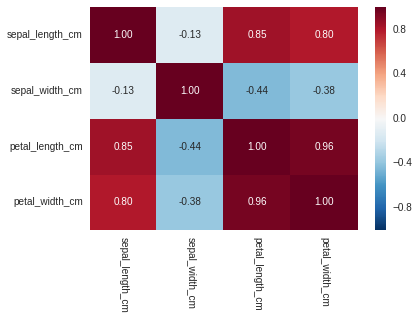

In [8]:
sns.heatmap(iris_data.corr(), annot=True, fmt='0.2f')
plt.xticks(rotation=270)

### Scatter matrix using pandas instead of seaborn

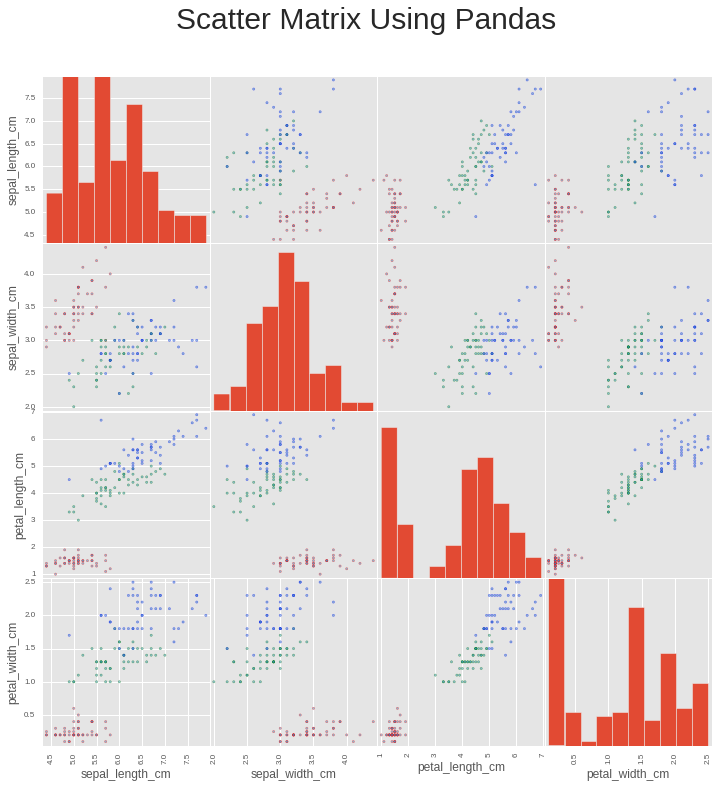

In [41]:
from pandas.tools.plotting import scatter_matrix
plt.style.use('ggplot')

colors_palette = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
colors = [colors_palette[c] for c in iris_data['category']]
scatter_matrix(iris_data.dropna(), figsize=(12,12), color=colors, diagonal='hist', grid=True)
plt.suptitle("Scatter Matrix Using Pandas", fontsize=30)
plt.show()

### You can see why the seaborn visualization library is so popular.  The defaults in pandas just aren't as nice and requires more coding to associate color to iris type.